# DFTTK Example for SQS

## Introduction

In [3]:
! dfttk run -h

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)

usage: dfttk run [-h] [-f STRUCTURE_FOLDER] [-mh MATCH_PATTERN] [-s SETTINGS]
                 [-r] [-wf WORKFLOW] [-ph] [-tag TAG] [-a] [-l] [-m [MAX_JOB]]
                 [-o] [-db [DB_FILE]]

optional arguments:
  -h, --help            show this help message and exit
  -f STRUCTURE_FOLDER, --structure_folder STRUCTURE_FOLDER
                        The folder/file containing the structure, Default: '.'
  -mh MATCH_PATTERN, --match_pattern MATCH_PATTERN
                        The match pattern for structure file, and it should be
                        place in quotes. e.g. '*POSCAR*'. Default: * --
                        everything except SETTING files, ref. -s
  -s SETTINGS, --setting SETTINGS
                        Specify the name of SETTINGS files (yaml or json file)
                        Default: SETTINGS (case insensitive and without ext)
                        The following f

## Run DFTTK

### Input
* Structure file of Al3Ni SQS (POSCAR.Al3Ni)

```
Title: Sun Sep 13 22:17:31 EDT 2020 /storage/work/y/yuw3/SQS/fcc/25/SQS16
 3.55
    0.500000    0.500000   -1.000000
    0.000000   -1.500000   -0.500000
   -2.000000    0.500000   -0.500000
Al Ni
12 4
Direct
0.25000000 0.18750000 0.31250000
0.25000000 0.43750000 0.06250000
0.50000000 0.12500000 0.87500000
0.50000000 0.37500000 0.62500000
0.50000000 0.62500000 0.37500000
0.50000000 0.87500000 0.12500000
0.75000000 0.06250000 0.43750000
0.75000000 0.31250000 0.18750000
0.75000000 0.56250000 0.93750000
0.75000000 0.81250000 0.68750000
1.00000000 0.75000000 0.25000000
1.00000000 1.00000000 1.00000000
0.25000000 0.68750000 0.81250000
0.25000000 0.93750000 0.56250000
1.00000000 0.25000000 0.75000000
1.00000000 0.50000000 0.50000000  
```
* Setting file (SETTINGS.yaml)

```yaml
override_default_vasp_params : 
    user_incar_settings :
        magmom: [16*1]
        store_raw_vasprunxml : True
        Relax_settings:
            PREC: High
            grid_density: 1000

phonon : True
force_phonon : True
phonon_supercell_matrix : [[0,1,1], [1,0,1], [1,1,0]]
```
Prepare POSCAR and SETTINGS.yaml file and put them in the same directory. Then run following commands to start the workflow.


### DFTTK run module



Use `-wf` to specify the workflow to run, here we use `robust` workflow. Use `-f` to specify the strucutre file, here the name of the structure file is `POSCAR`. Use `-s` to specify the setting file, here the setting file is `SETTINGS.yaml`. Use -l to launch the workflow to launchpad. For more options, please refer to `dfttk run -h`



In [4]:
! dfttk run -wf robust -f POSCAR.Ni3Al -s SETTINGS -l -m 1

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)

phonon setting {'user_incar_settings': {'magmom': ['32*1.0'], 'store_raw_vasprunxml': True, 'Relax_settings': {'PREC': 'High', 'grid_density': 1000}}}
2021-11-08 12:58:38,422 INFO Added a workflow. id_map: {-4: 6901, -3: 6902, -2: 6903, -1: 6904}
/Users/thea/opt/anaconda3/envs/dfttk/lib/python3.8/site-packages/pymatgen/analysis/path_finder.py:36: FutureWarning: This code has been superseded by pymatgen.analysis.neb in the separate add-on packagepymatgen-diffusion. This module here is retained for backwards compatibility. It will be removed from2022.1.1.
  warnings.warn(
2021-11-08 12:58:40,716 INFO moving to launch_dir /Users/thea/Desktop/rs_dfttk/dfttk_example/jupyter_notebook/SQS16
2021-11-08 12:58:40,716 ERROR ----|vvv|----
2021-11-08 12:58:40,716 ERROR Error writing/submitting queue script!
2021-11-08 12:58:40,719 ERROR Traceback (most recent call last):
  File "/Users/thea/opt/anaconda3/e

In [6]:
! dfttk run -wf robust -f POSCAR.Al3Ni -s SETTINGS -l
! dfttk run -wf robust -f POSCAR.NiAl -s SETTINGS -l

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)

phonon setting {'user_incar_settings': {'magmom': ['32*1.0'], 'store_raw_vasprunxml': True, 'Relax_settings': {'PREC': 'High', 'grid_density': 1000}}}
2021-11-08 13:00:03,270 INFO Added a workflow. id_map: {-4: 6905, -3: 6906, -2: 6907, -1: 6908}
DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)

phonon setting {'user_incar_settings': {'magmom': ['32*1.0'], 'store_raw_vasprunxml': True, 'Relax_settings': {'PREC': 'High', 'grid_density': 1000}}}
2021-11-08 13:00:06,699 INFO Added a workflow. id_map: {-4: 6909, -3: 6910, -2: 6911, -1: 6912}


To launch the DFT batch job in the computers that VASP installed, you can use `qlaunch singleshot`

To manage workflow and check the status of your work, you can use `lpad` command. For more options, please refer to `lpad -h`

In [8]:
! lpad get_wflows

[
    {
        "state": "COMPLETED",
        "name": "Zn5(Pd3Au)2:EV_QHA_Append--1831",
        "created_on": "2020-06-26T12:29:11.762000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "Zn2Pd11:EV_QHA_Append--1856",
        "created_on": "2020-06-26T12:45:22.360000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "Zn11Au2:EV_QHA_Append--1861",
        "created_on": "2020-06-26T12:56:26.740000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "Zn5Au8:EV_QHA_Append--1888",
        "created_on": "2020-06-26T13:03:52.528000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "Zn2Pd5Au6:EV_QHA_Append--1891",
        "created_on": "2020-06-26T13:35:24.700000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
  

        "name": "Al6Ru:EV_QHA--4588",
        "created_on": "2021-05-06T19:03:17.213000",
        "states_list": "C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "AlRu:EV_QHA_Append--4608",
        "created_on": "2021-05-06T21:10:51.276000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "AlRu:QHA--4629",
        "created_on": "2021-05-06T23:27:37.859000",
        "states_list": "C"
    },
    {
        "state": "COMPLETED",
        "name": "Al6Ru:EV_QHA_Append--4630",
        "created_on": "2021-05-06T23:31:27.580000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "Al2Ru:EV_QHA_Append--4660",
        "created_on": "2021-05-07T04:50:46.687000",
        "states_list": "C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C-C"
    },
    {
        "state": "COMPLETED",
        "name": "Ru:

## Plot thermodynamic properties

Use `dfttk thfind` to check the completed task.

In [9]:
! dfttk thfind

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)


found complete calculations in the collection: phonon 

{'tag': '428621f2-f44f-4c92-b307-04a89c77da5f'}, phonon: 13, static: 13, SN:  16, qha_phonon: T, ZnPd_P4.mmm_123PBE
{'tag': 'a715a62f-bfa7-4d95-bffb-41d56865c488'}, phonon: 13, static: 13, SN:  16, qha_phonon: T, ZnPd_P4.mmm_123PBE#0
{'tag': '6b23d6a5-d15c-46de-be2f-f021159e852d'}, phonon:  8, static:  8, SN:  52, qha_phonon: T, Zn8Pd5_I-43m_217PBE
{'tag': 'fa5e4e62-91b0-4c62-acff-26ae851da38b'}, phonon:  9, static:  9, SN:  33, qha_phonon: T, ZnPd10_P-1_2PBE_FM
{'tag': '76dd7e4c-9c8e-4f8e-8083-b4aaa6218eb9'}, phonon:  8, static:  8, SN:  27, qha_phonon: F, ZnPd8_P-31m_162PBE_FM
{'tag': '3c01629a-b287-41f5-8826-d77912f54177'}, phonon:  7, static:  8, SN:  64, qha_phonon: T, Al_Fm-3m_225PBE
{'tag': 'db521c56-bd17-4b15-9887-ff964f0c6f7c'}, phonon:  7, static:  7, SN:  90, qha_phonon: T, Al3Ru2_I4.mmm_139PBE
{'tag': '48623a91-47ac-4054-b46b

Check the tag for the workflow for Al. Then use `dfttk thfind` to plot all thermodynamic properties based on DFTTK results. For more options, please refer to ` dfttk thfind -h` 

For SQS Al3Ni, copy the metatag to get the results

In [11]:
! dfttk thfind -tag 89398cfb-eb08-4680-8158-384942c1e414 -get -renew -plot DFTTK -fitF -expt ExptData.json

DFTTK version: 0.3.4+8.g7f57cf0
Copyright © Phases Research Lab (https://www.phaseslab.com/)


found complete calculations in the collection: phonon 

{'tag': '89398cfb-eb08-4680-8158-384942c1e414'}, phonon:  8, static:  8, SN:  32, qha_phonon: T, Al3Ni_P-1_2PBE

1/1 qha_phonon successful under the given searching conditions.


Postprocess for thermodynamic properties, Seebeck, Lorenz number etc.

Full Formula (Al12 Ni4)
Reduced Formula: Al3Ni
abc   :   4.775161   6.687745   8.659253
angles:  95.686685  96.696629  95.567740
Sites (16)
  #  SP       a       b       c    magmom
---  ----  ----  ------  ------  --------
  0  Al    0.25  0.1875  0.3125     0
  1  Al    0.25  0.4375  0.0625     0
  2  Al    0.5   0.125   0.875     -0
  3  Al    0.5   0.375   0.625     -0
  4  Al    0.5   0.625   0.375     -0
  5  Al    0.5   0.875   0.125      0
  6  Al    0.75  0.0625  0.4375    -0
  7  Al    0.75  0.3125  0.1875     0
  8  Al    0.75  0.5625  0.9375    -0
  9  Al    0.75  0.8125  0.6875  

The figures are in folder `Al3Ni_P-1_2PBE/figures`

Heat_capacities_300.png


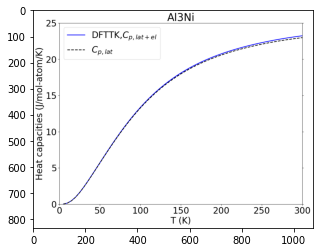

Bulk_modulus.png


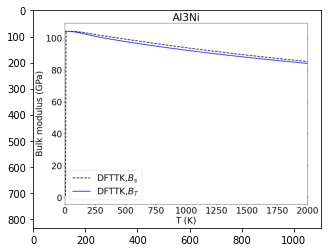

LTC.png


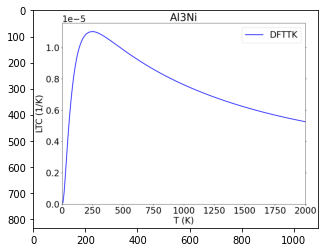

Effective_charge_carrier_concentration_100.png


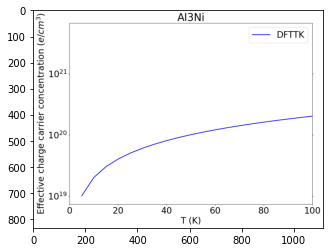

vdos298.15.png


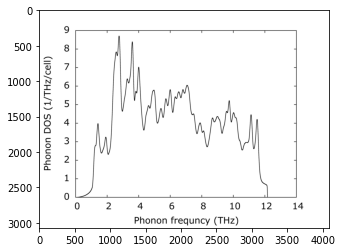

Helmholtz_energy.png


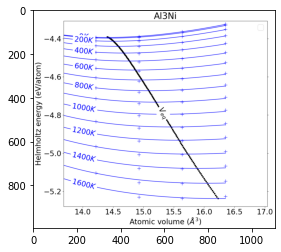

Heat_capacities_1000_oT2.png


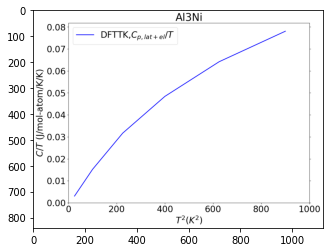

Lorenz_number.png


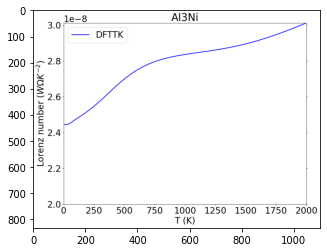

Helmholtz_energy_analysis.png


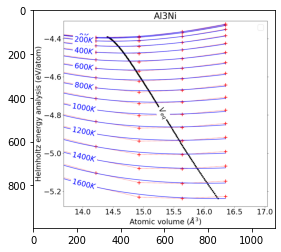

vdis298.15.png


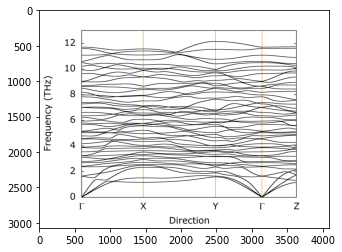

Gibbs_energy-H298.png


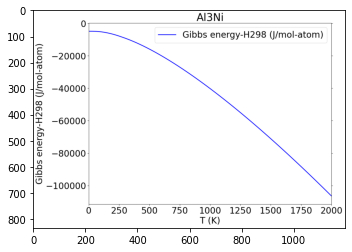

Debye_temperature.png


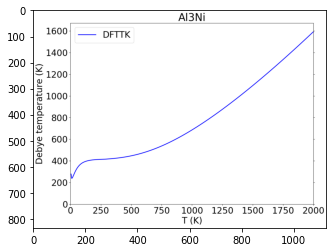

Heat_capacities_100_oT2.png


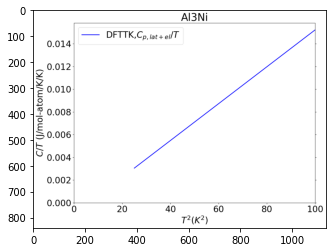

Seebeck_coefficients.png


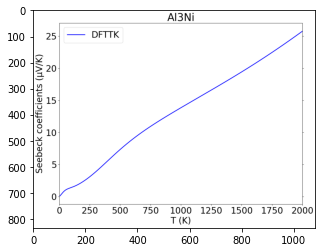

Effective_charge_carrier_concentration.png


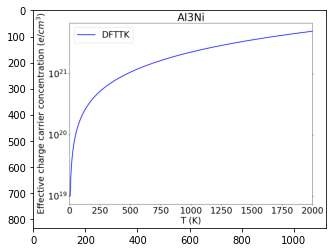

Absolute_thermal_electric_force.png


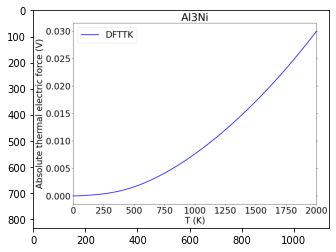

Gruneisen_coefficient.png


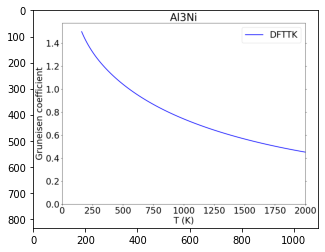

0_K_total_energies.png


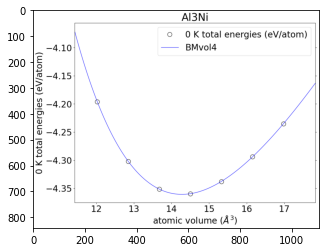

Debye_temperature_70.png


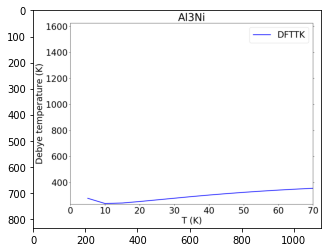

Enthalpy-H298.png


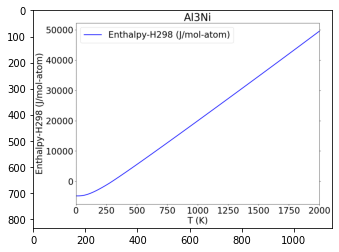

Heat_capacities_300_el_oT.png


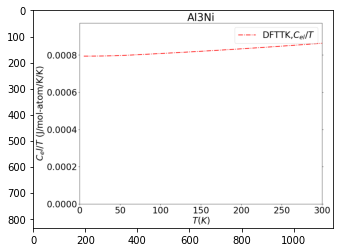

Atomic_volume.png


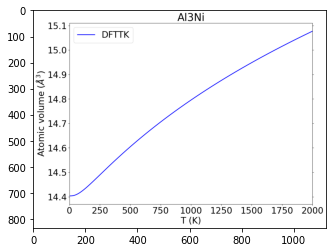

Entropy.png


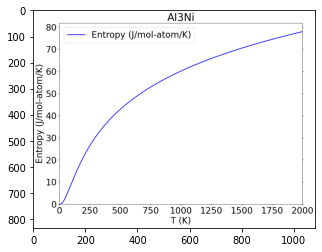

Heat_capacities.png


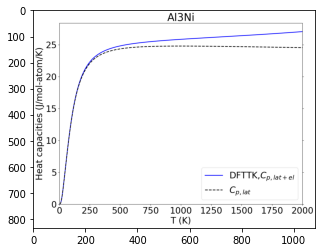

In [12]:
import os
import matplotlib.image as im
import matplotlib.pyplot as plt
%matplotlib inline
path_name='Al3Ni_P-1_2PBE/figures'
for item in os.listdir(path=path_name):
    if 'eps' not in item:
        print (item)
        img = im.imread(os.path.join(path_name,item))
        plt.imshow(img)
        plt.show()

You can also specify the figure that you would like to plot.

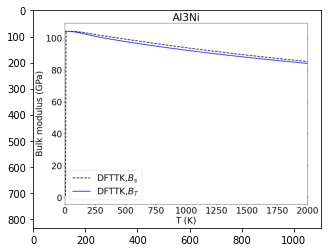

In [13]:
path_name='Al3Ni_P-1_2PBE/figures'
item='Bulk_modulus.png'
img = im.imread(os.path.join(path_name,item))
plt.imshow(img)
plt.show()

In addtion to figures, original data are generated by `thfind`